# Ford Go Bike Analysis
## by Malak Elshenawy

## Preliminary Wrangling

> Dataset Ford Go Bike Data can be downloaded from here: https://www.fordgobike.com/system-data
This dataset includes information about individual rides made in a bike-sharing system covering different areas.
Here we wrangle and explore Ford Go Bike trip data which it makes available for public use. It includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type
- Member Year of Birth
- Member Gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#read dataset into a dataframe
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#check that the dataset has been imorted correctly
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#check columns,rows and data types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
#check for duplicates
df.duplicated().sum()

0

In [6]:
#check for sum of null values in each column
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#how many unique values in bike_id column
df.bike_id.nunique()

4646

E:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


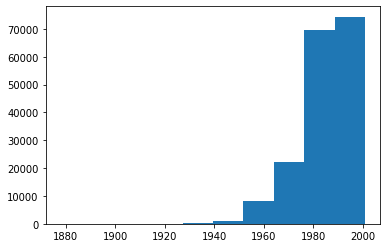

In [8]:
# Check the distribution of member_birth_year for outliers
plt.hist(df.member_birth_year);

Graph indicate that there are outliers. We will handle this later on.

In [9]:
# Check for the value counts in gender
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
# Check for the value counts in user type
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
# Check for the value counts in bike_share_for_all_trip
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [12]:
#check statistics of each column
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
# Check if the number of unique values of start_station_id and start_station_name match
df.start_station_id.nunique()

329

In [14]:
df.start_station_name.nunique()

329

In [69]:
#confirm they are unique and the same
df.groupby(['start_station_id', 'start_station_name']).size()

start_station_id  start_station_name                                
3.0               Powell St BART Station (Market St at 4th St)          2760
4.0               Cyril Magnin St at Ellis St                            610
5.0               Powell St BART Station (Market St at 5th St)          2327
6.0               The Embarcadero at Sansome St                         2082
7.0               Frank H Ogawa Plaza                                    827
8.0               The Embarcadero at Vallejo St                          649
9.0               Broadway at Battery St                                 905
10.0              Washington St at Kearny St                             793
11.0              Davis St at Jackson St                                 962
13.0              Commercial St at Montgomery St                         746
14.0              Clay St at Battery St                                  796
15.0              San Francisco Ferry Building (Harry Bridges Plaza)    2710
16.0   

## Quality Issues
### Incorrect data types:

    a. start_time and end_time should be datetime series instead of objects

    b. start_station_id and end_station_id should be either integers or strings instead of floats

    c. member_birth_year should be integers instead of floats

    d. member_gender, user_type and bike_share_for_all_tripshould be categorical instead of normal objects

- member_gender and member_birth_year have high number of missing values
- start_station_id, start_station_name, end_station_id, end_station_name have simultaneously occuring missing values.
- Oldest member_birth_year is 1878 which is an outlier. 

## Cleaning 

In [16]:
#create a copy of the dataframe to clean it
df_copy = df.copy()

### start_time and end_time should be datetime series instead of objects
* Convert start_time and endtime to datetime

In [17]:
df_copy.start_time = pd.to_datetime(df_copy.start_time)
df_copy.end_time = pd.to_datetime(df_copy.end_time)

### start_station_id and end_station_id should be either integers or strings instead of floats
* Convert start_station_id and end_station_id to string datatype

In [18]:
df_copy.start_station_id = df_copy.start_station_id.astype(str)
df_copy.end_station_id = df_copy.end_station_id.astype(str)

# Remove .0 at the end
df_copy.start_station_id = df_copy.start_station_id.apply(lambda x : x.split('.')[0])
df_copy.end_station_id = df_copy.end_station_id.apply(lambda x : x.split('.')[0])

### member_gender, user_type and bike_share_for_all_trip should be categorical instead of normal objects
* Convert member_gender, user_type and bike_share_for_all_trip datatypes to categorical

In [19]:
# Convert member_gender
ord_gender = ['Male', 'Female', 'Other']
cat_gender = pd.api.types.CategoricalDtype(ordered = True, categories = ord_gender)
df_copy.member_gender = df_copy.member_gender.astype(cat_gender)

In [20]:
# Convert user_type
df_copy.user_type = df_copy.user_type.astype('category')

In [21]:
 # Convert bike_share_for_all_trip
df_copy.bike_share_for_all_trip = df_copy.bike_share_for_all_trip.astype('category')

## remove outliers in member_birth_year

In [22]:
#check for value to remove any smaller than it as they are ourliers as stated by the graph in the wrangling phase
df_copy['member_birth_year'].describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [23]:
#remove rows with birth year before 1950
df_copy = df_copy.query('member_birth_year >= 1950')

### Check cleaning steps done correctly 

In [24]:
#confirm cleaning steps
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174473 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174473 non-null int64
start_time                 174473 non-null datetime64[ns]
end_time                   174473 non-null datetime64[ns]
start_station_id           174473 non-null object
start_station_name         174278 non-null object
start_station_latitude     174473 non-null float64
start_station_longitude    174473 non-null float64
end_station_id             174473 non-null object
end_station_name           174278 non-null object
end_station_latitude       174473 non-null float64
end_station_longitude      174473 non-null float64
bike_id                    174473 non-null int64
user_type                  174473 non-null category
member_birth_year          174473 non-null float64
member_gender              174473 non-null category
bike_share_for_all_trip    174473 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(2), ob

## Save df_copy to a seperate csv file

In [25]:
#save a copy of the dataframe to a csv file
df_copy.to_csv('ford-clean.csv', index=False)

### What is the structure of your dataset?

> In the dataset, there are total 16 columns for referring to 16 different variables and 183412 rows referring to observations. 
> The variables in details:

- 3 columns referring to 3 categorical variables.

    - member_gender (Male, Female, Other)

    - bike_share_for_all_trip (yes, no)

    - user_type (customer, subscriber)

- 10 columns referring to postion, name, id, date and time of the starting and ending stations
- 1 column for bike information(bike_id)
- 1 column for member_birth_year 
- 1 column for trip duration(duration_sec)

### What is/are the main feature(s) of interest in your dataset?

> Exploring and understanding information about the members in relation to their usage of the bikes.

- What are the times people are likely to rent a bike.For example: time in the form of hours, days...
- For what duration people are likely to rent a bike? 
- Does rent time affect the distance they travel?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  Age-group will have the strongest effect on peoples' usage.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## What are the times people are likely to rent a bike?
- First I will create columns for hour and day

In [26]:
df_copy['week_day'] = df_copy.start_time.dt.weekday_name
df_copy['hour'] = df_copy.start_time.dt.hour

In [27]:
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
week_ord = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_copy.week_day = df_copy.week_day.astype(week_ord)

In [28]:
#confirm columns creation
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_day,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23


> Then I will investigate bikes rented per each week day

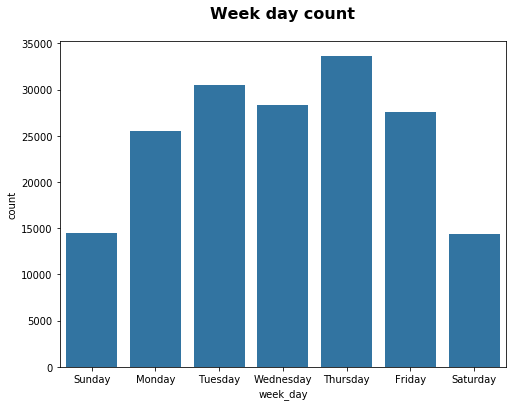

In [66]:
# Set the figure size
plt.figure(figsize = (8,6))

# Set the base color
base_color = sb.color_palette()[0]
plt.title("Week day count", y=1.05, fontsize=16, fontweight='bold')

# Plot the countplot for weekday
sb.countplot(data = df_copy, x = 'week_day', color = base_color)

## It is clearly stated that people tend to rent bikes the most on Thursdays and least rent days are Sunday and Saturday

> Now I will check the highest number of hours a bike has been rented and the lowest number of hours. Also I will observe the most rented timing among users

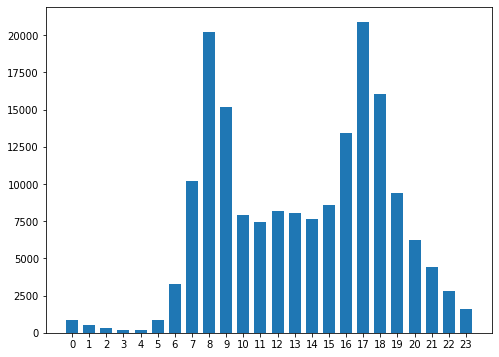

In [30]:
plt.figure(figsize = (8,6))

# Set the range and the bin size
bin_edges = np.arange(-0.5, 23.5+1, 1)

plt.hist(df_copy.hour, bins = bin_edges, rwidth = 0.7);

# Set the xticks
locations = np.arange(0, 24, 1 )
plt.xticks(locations, locations.astype(str));

## The number of hours bikes have been rented by users vary from less than an hour up to 23 hours. With the highes of 17 and lowes of 3 hours.

> Investigate the duration of each trip in seconds

In [31]:
df_copy.duration_sec.describe()

count    174473.000000
mean        704.465562
std        1644.054536
min          61.000000
25%         323.000000
50%         511.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

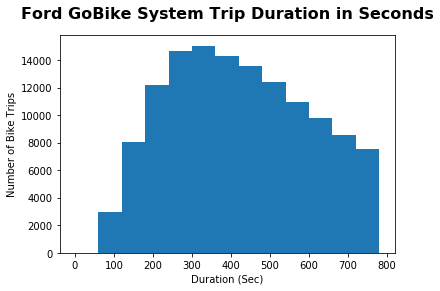

In [32]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 800, 60)

plt.hist(data = df_copy, x = 'duration_sec', bins = bin_edges);

plt.title("Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

## The average trip is just under 500 seconds, with 75% of trips being under 796 seconds. This suggests riders are taking the bikes short distances.

> Now, we need to explore the age variable. For that we need to add an age column and calculate each user's age by subtraction their birth year from 2021.

In [33]:
# Calculate the member age
df_copy['member_age'] = 2021 - df_copy.member_birth_year

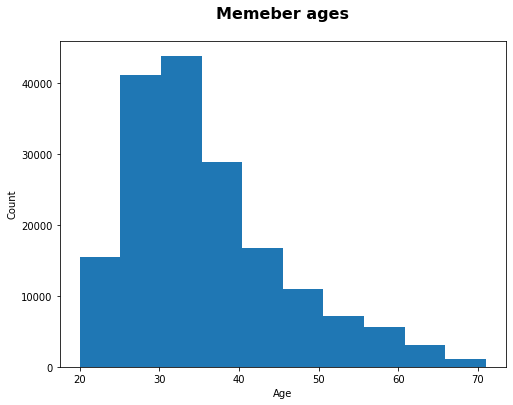

In [54]:
# Plot the distribution of age values
plt.figure(figsize = (8,6))
plt.title("Memeber ages", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count');
plt.hist(data = df_copy, x = 'member_age');

> Adjust bin size and remove max age as it is an outlier to improve graph visibility

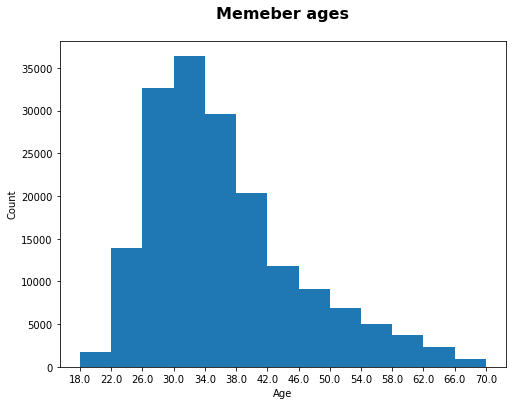

In [55]:
# Plot the distribution of age values with suitable bin size
plt.figure(figsize = (8,6))
bin_edges = np.arange(18, df_copy.member_age.max(), 4)
plt.title("Memeber ages", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count');
plt.hist(data = df_copy, x = 'member_age', bins = bin_edges);
plt.xticks(bin_edges, bin_edges.astype(str));

## The graph is a right skewed which clearly shows that people with ages between 26 and 34 rented most bikes while people in the older age groups between 74 and 82 and less than 22 the rented least bikes.

> Lets now explore the categorical variables we have: member_gender, user_type and bike_share_for_all_trip

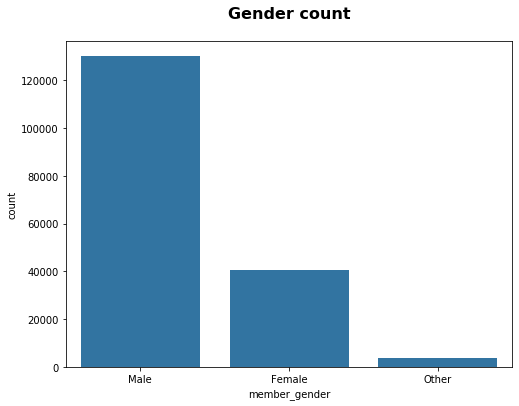

In [56]:
# Set the figure size
plt.figure(figsize = (8,6))

# Set the base color
base_color = sb.color_palette()[0]
plt.title("Gender count", y=1.05, fontsize=16, fontweight='bold')

# Plot the countplot for weekday
sb.countplot(data = df_copy, x = 'member_gender', color = base_color)

## Clearly stated that Males have rented the most bikes.

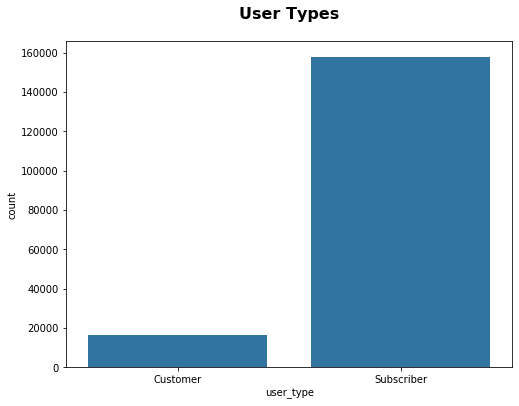

In [57]:
plt.figure(figsize = (8,6))

# Set the base color
base_color = sb.color_palette()[0]
plt.title("User Types", y=1.05, fontsize=16, fontweight='bold')

# Plot the countplot for weekday
sb.countplot(data = df_copy, x = 'user_type', color = base_color)

## The majority of the type of users are subscribers

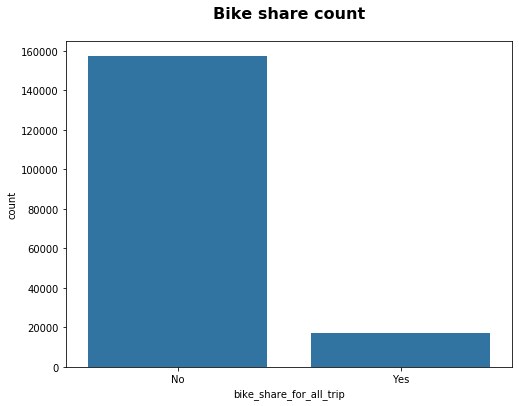

In [58]:
plt.figure(figsize = (8,6))

# Set the base color
base_color = sb.color_palette()[0]
plt.title("Bike share count", y=1.05, fontsize=16, fontweight='bold')

# Plot the countplot for weekday
sb.countplot(data = df_copy, x = 'bike_share_for_all_trip', color = base_color)

## Normaly users do not share bikes throughout the trip

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Calculating age resulted in outliers that were needed to be removed to view the results.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> member_birth_year variable had the oldest member_birth_year is 1878 which is an outlier. Then during the exploration part other outliers where found and handeled.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## We will start exploring duration_sec with other variables. 
First we will explore relationship between duration and week days through violinplot and pointpot. For better results we will limit the duration_sec column to the first and third percentile.

In [43]:
#getting the percentiles
df_copy.duration_sec.describe()

count    174473.000000
mean        704.465562
std        1644.054536
min          61.000000
25%         323.000000
50%         511.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [41]:
#applying the percentiles while filtering for the results before plotting them
time_data = df_copy[['week_day', 'hour', 'duration_sec']].query('duration_sec >= 323 & duration_sec <= 789')

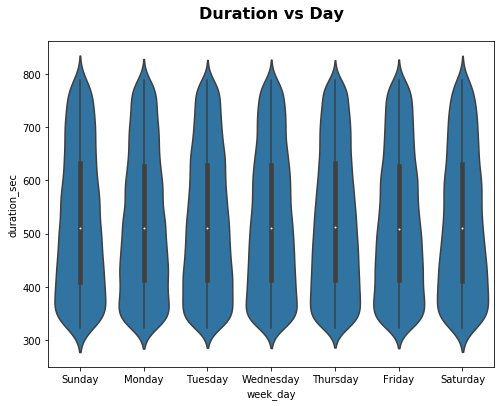

In [59]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
plt.title("Duration vs Day", y=1.05, fontsize=16, fontweight='bold')

# Plot the violinplot for duration_sec vs week_day
sb.violinplot(data = time_data, x = 'week_day', y = 'duration_sec', color = base_color)

 - Results show similar durations accross all week days

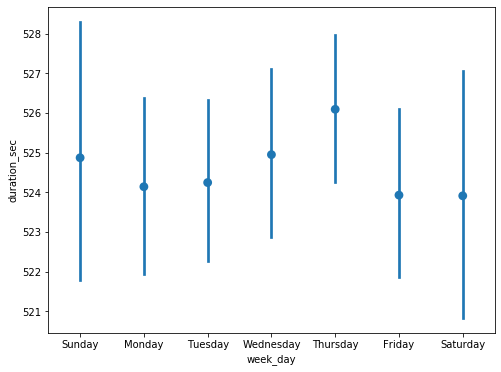

In [44]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]

# Plot the pointplot for duration_sec vs weekday
sb.pointplot(data = time_data, x = 'week_day', y = 'duration_sec', color = base_color, linestyles = '')

Although most bikes may have been rented on weekdays for same duration but people have liked to rent bikes on weekends for a longer duration

## we will explore relationship between duration and what hour of day did the rent occur

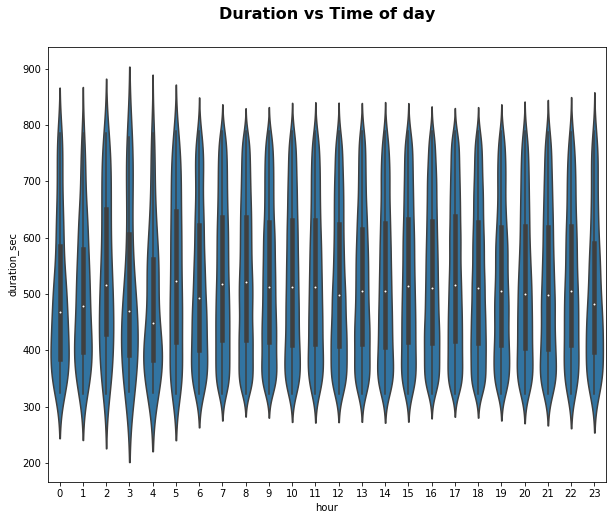

In [61]:
plt.figure(figsize = (10, 8))
base_color = sb.color_palette()[0]
plt.title("Duration vs Time of day", y=1.05, fontsize=16, fontweight='bold')
sb.violinplot(data = time_data, x = 'hour', y = 'duration_sec', color = base_color)

- All hours are positively skewed. 
- Less number of bikes have been rented during 10pm and 2 am
- Most number of bikes being rented at 8 am and 2 pm 
- Bikes rented around 4 am were for low duration of around 400seconds
- Most number of bikes around 2 p.m. were rented for high duration of around 600 seconds.

## Customer Usage by day vs. Subscriber Usage by day

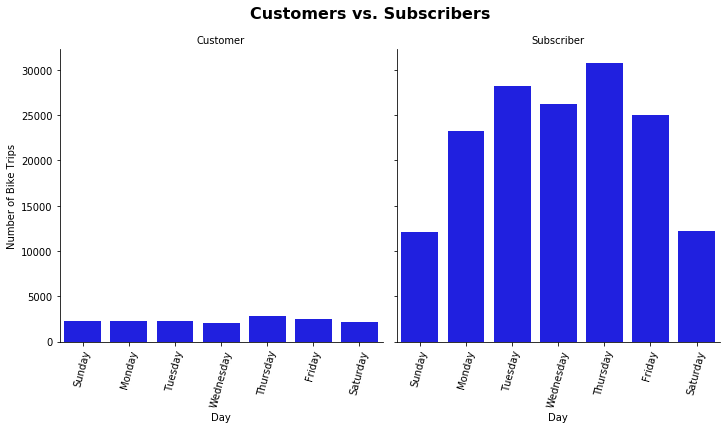

In [62]:
#https://stackoverflow.com/questions/51772467/specify-color-in-seaborn-catplot
graph = sb.catplot(data=df_copy, x='week_day', col="user_type", kind='count', sharey = True,palette=sb.color_palette(['blue']));

graph.set_axis_labels("Day", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

- Customer usage per day are almost all the same.
- Customer usage are significantly lower than Subscriber usage
- Subscribers tend to rent bikes the most on Thursdays
- Subscribers tend to rent bikes the least during the week ends.

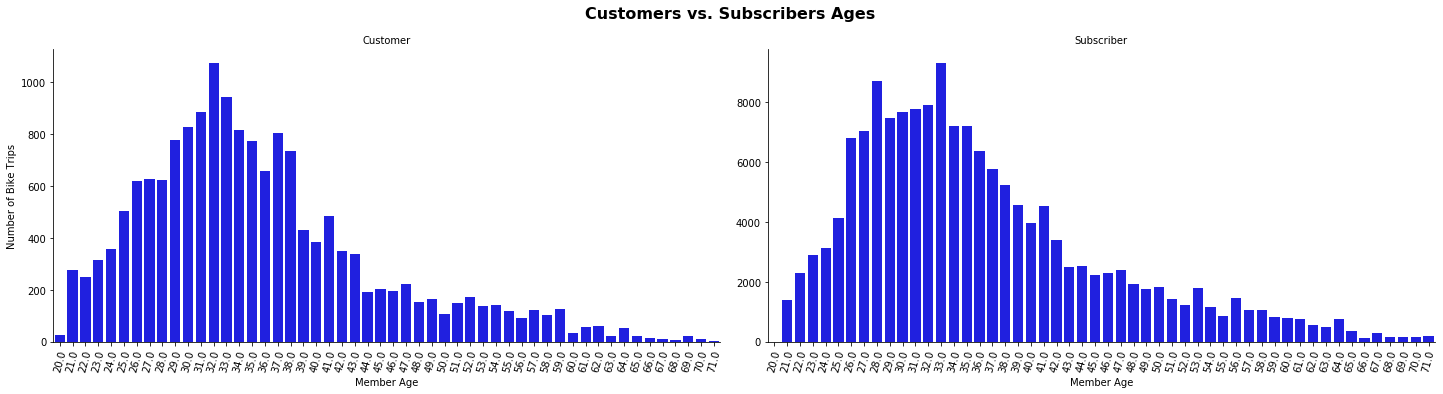

In [63]:
#https://stackoverflow.com/questions/51772467/specify-color-in-seaborn-catplot
graph = sb.catplot(data = df_copy, x = 'member_age', col='user_type', kind='count', sharey = False, height=5, aspect=2,palette=sb.color_palette(['blue']))

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Customers vs. Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Comapring duration with weekdays,showed that people are likely to go for long rides on weekends although most bikes get rented on weekdays. The data also suggests Subscribers are daily or full time students/workers who rent bikes during weekdays and for shorter distances. They rent bikes during the period from 8-9am and 3-4pm.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In users type, Customers usually take longer rides when compared with Subscribers. From the exploration it is clear that Subscribers use the bikes as a way of transportation to and from work/school indicating that they might be student or workers as stated before.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

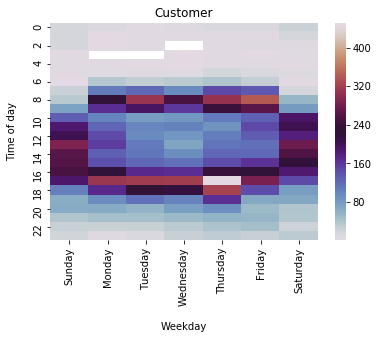

In [64]:
df_customer = df_copy.query('user_type == "Customer"').groupby(['hour', 'week_day'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('hour', 'week_day', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.5)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Time of day',  labelpad = 16)

plt.show()

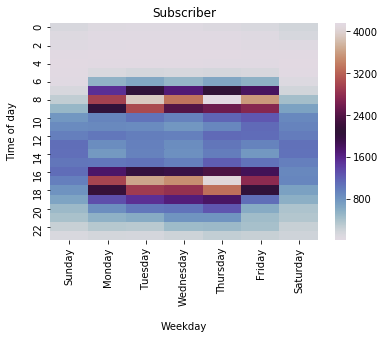

In [65]:
# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_subscriber = df_copy.query('user_type == "Subscriber"').groupby(['hour', 'week_day'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('hour', 'week_day', 'bike_id')

heat_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title('Subscriber', y=1.5)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Time of day',  labelpad = 16)

plt.show()

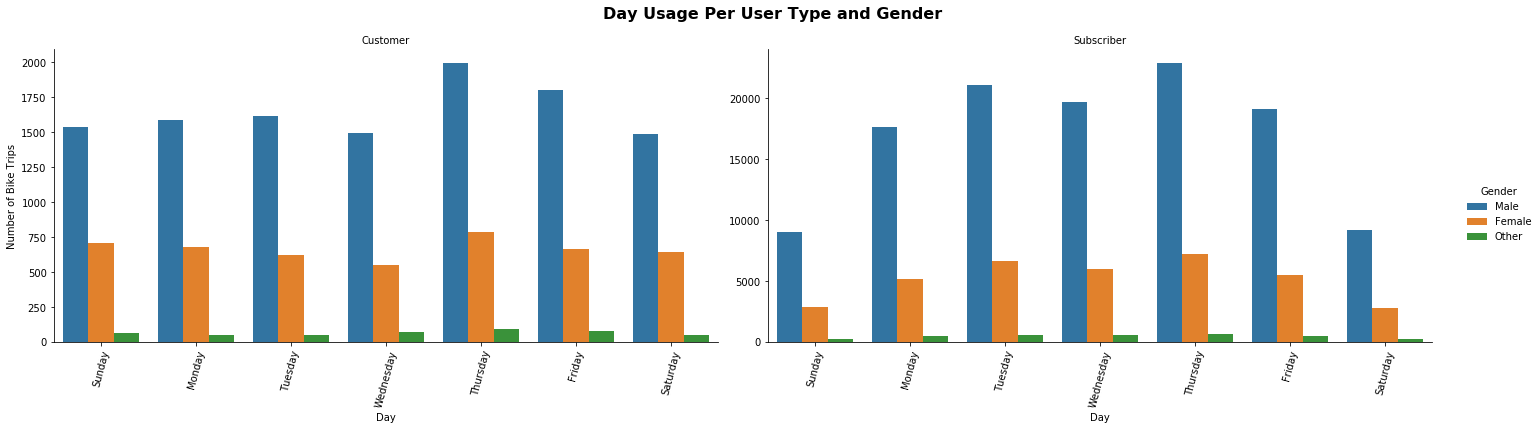

In [49]:
# Day usage - user type and gender
graph = sb.catplot(data=df_copy, x='week_day', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Day", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Day Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Nothing new got investigated. Customers go for rides when the Subscribers dont and vice versa.

### Were there any interesting or surprising interactions between features?

>  The majority of users that go for rides are Males as both customers and subscribers.

In [50]:
#save further cleaning steps made to the dataframe ( removing age outliers)
df_copy.to_csv('ford-clean.csv', index=False)